# Project 3: Analyzing Chess Tournament Results
## Dana Nave

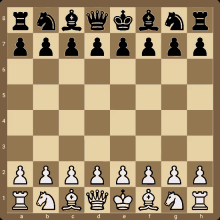

## Project Requirements:
Given a text file named “tournamentinfo.txt”, create a Jupyter Notebook that generates a .CSV file with the following information
for each of the chess players:
* Player’s Name, Player’s State, Total Number of Points, Player’s Pre-Rating, and Average Pre Tournament Chess Rating of Opponents

## Approach:
I will divide the work of this project into a few stages according to the desired ending table: name, state, points, pre rating, and the average pre rating and CSV. Throughout the project, I will use many print statements in order to examine my results and obtain a visual understanding of the data modifications. I will combine regular expressions to adjust the data to the requirements along with re functions and create various types of loops.

In [80]:
# Import NumPy library
import numpy as np
# Import Pandas library
import pandas as pd
# Import the re library to preform regular expressions work
import re

##### Step 1: Name
    a. Upload the text file (“tournamentinfo.txt”) to GitHub.
    b. Import the file from GitHub into a dataframe, dropping the header.
    c. Create a regex pattern according to match the desired structure: '\--+'
    d. Apply the pattern on the data using a boolean test
    e. Drop unnecessary rows
    f. Add a regex to drop the data separation signs: '|' and using the split() function te return into separated columns.

In [81]:
# Import the raw data that was pushed to GitHub, save it to dataframe Original and indicate no header
Original1 = pd.read_csv('https://raw.githubusercontent.com/dnave/AIM-5001/master/tournamentinfo.txt', header = None)

# Create a pattern that includes what I want to delete from the data and save it to variable
Pattern = '\--+'

# Create a boolean test: from the data, if the pattern applies to the row, mark True, and if not, False
B_test = Original1[0].str.contains(Pattern)

# Choose only rows with a False boolean from the test
False_Result=Original1[~B_test]

# Dropping the first 2 rows that are headers
False_Result=False_Result.drop([1,2])

# Create a regex to separate the data and return it into separated columns with the split() function.
Step_1 = False_Result[0].str.split("|", expand = True) 

# Print first 10 rows
Step_1.head(10)

,0,1,2,3,4,5,6,7,8,9,10
4,1,GARY HUA,6.0,W 39,W 21,W 18,W 14,W 7,D 12,D 4,
5,ON,15445895 / R: 1794 ->1817,N:2,W,B,W,B,W,B,W,
7,2,DAKSHESH DARURI,6.0,W 63,W 58,L 4,W 17,W 16,W 20,W 7,
8,MI,14598900 / R: 1553 ->1663,N:2,B,W,B,W,B,W,B,
10,3,ADITYA BAJAJ,6.0,L 8,W 61,W 25,W 21,W 11,W 13,W 12,
11,MI,14959604 / R: 1384 ->1640,N:2,W,B,W,B,W,B,W,
13,4,PATRICK H SCHILLING,5.5,W 23,D 28,W 2,W 26,D 5,W 19,D 1,
14,MI,12616049 / R: 1716 ->1744,N:2,W,B,W,B,W,B,B,
16,5,HANSHI ZUO,5.5,W 45,W 37,D 12,D 13,D 4,W 14,W 17,
17,MI,14601533 / R: 1655 ->1690,N:2,B,W,B,W,B,W,B,


##### Step 2: State
    a. In order to find the player's ID numbers, I will create a regex that will match the ID and will be used as a row identifier. The regex will be saved to a new dataframe. 
    b. Once I have the row identifiers, I will reset the index of the original dataframe and delete any unnecessary information.
    c. Create another regex that will be used as a separator between the data that I need.
    d. Call the split function in order to return the data after it was split and divided into columns and drop columns that are not in use.
    e. Create another regex to find the pre rating numbers and convert the dataframe into int32 data type for further use.

In [82]:
# a.
# finding the rows that contain the chess match results and organize it by player's ID number.
# Creating a regex that includes white space and a number that will identify each player - ID.
Player_ID=re.compile("^\s+[0-9]")

# Create a boolean test: from the data, if the pattern applies to the tournament results, mark True, and if not, False
Player=Step_1[0].str.contains(Player_ID)

# Print to verify results of the boolean test
Player.head(10)


4      True
5     False
7      True
8     False
10     True
11    False
13     True
14    False
16     True
17    False
Name: 0, dtype: bool

In [83]:
#a.
# Creating a new dataframe that contain only the rows with the player info
# Use only the False results and save to new dataframe
Row2=Step_1[~Player]

# Print to verify results
Row2.head(10)

,0,1,2,3,4,5,6,7,8,9,10
5,ON,15445895 / R: 1794 ->1817,N:2,W,B,W,B,W,B,W,
8,MI,14598900 / R: 1553 ->1663,N:2,B,W,B,W,B,W,B,
11,MI,14959604 / R: 1384 ->1640,N:2,W,B,W,B,W,B,W,
14,MI,12616049 / R: 1716 ->1744,N:2,W,B,W,B,W,B,B,
17,MI,14601533 / R: 1655 ->1690,N:2,B,W,B,W,B,W,B,
20,OH,15055204 / R: 1686 ->1687,N:3,W,B,W,B,B,W,B,
23,MI,11146376 / R: 1649 ->1673,N:3,W,B,W,B,B,W,W,
26,MI,15142253 / R: 1641P17->1657P24,N:3,B,W,B,W,B,W,W,
29,ON,14954524 / R: 1411 ->1564,N:2,W,B,W,B,W,B,B,
32,MI,14150362 / R: 1365 ->1544,N:3,W,W,B,B,W,B,W,


In [84]:
# b.
# Resetting the index so that it will work as a key
Row2=Row2.reset_index(drop=True)

# Print to verify results
Row2.head(10)

,0,1,2,3,4,5,6,7,8,9,10
0,ON,15445895 / R: 1794 ->1817,N:2,W,B,W,B,W,B,W,
1,MI,14598900 / R: 1553 ->1663,N:2,B,W,B,W,B,W,B,
2,MI,14959604 / R: 1384 ->1640,N:2,W,B,W,B,W,B,W,
3,MI,12616049 / R: 1716 ->1744,N:2,W,B,W,B,W,B,B,
4,MI,14601533 / R: 1655 ->1690,N:2,B,W,B,W,B,W,B,
5,OH,15055204 / R: 1686 ->1687,N:3,W,B,W,B,B,W,B,
6,MI,11146376 / R: 1649 ->1673,N:3,W,B,W,B,B,W,W,
7,MI,15142253 / R: 1641P17->1657P24,N:3,B,W,B,W,B,W,W,
8,ON,14954524 / R: 1411 ->1564,N:2,W,B,W,B,W,B,B,
9,MI,14150362 / R: 1365 ->1544,N:3,W,W,B,B,W,B,W,


In [85]:
# b.
# Dropping the columns that contain unnecessary information - 
# I can see in the print above that all columns other than 0 and 1 are not relevant for this stage
Row2=Row2.drop(columns=[2,3,4,5,6,7,8,9,10],axis=1)

# Print to verify results
Row2.head()


,0,1
0,ON,15445895 / R: 1794 ->1817
1,MI,14598900 / R: 1553 ->1663
2,MI,14959604 / R: 1384 ->1640
3,MI,12616049 / R: 1716 ->1744
4,MI,14601533 / R: 1655 ->1690


In [86]:
# c+d+e. 
# Split the string into variables in order to with a regex that will split column 1 
# to get the value 'Pre_rating' from data columns: USCF_ID, Pre_rating, R and Post_rating

Row2[['USCF_ID', 'R','Pre_rating','Post_rating']] = Row2[1].str.split ("/|->|:", expand = True) 

# Dropping the columns that contain unnecessary information - USCF_ID, R, and Post_rating
Row2=Row2.drop(columns=[1,'R','Post_rating','USCF_ID'],axis=1)

# Print to verify results
Row2.head(10)

,0,Pre_rating
0,ON,1794
1,MI,1553
2,MI,1384
3,MI,1716
4,MI,1655
5,OH,1686
6,MI,1649
7,MI,1641P17
8,ON,1411
9,MI,1365


In [87]:
#e.
# Assign column 0 to the name State to indicate the player's origin State
Row2.rename(columns={0:'State',},inplace = True)

# Assigning a regex to find the Pre_rating number for each player - a single number, not a range
# Call the extract function to use the regex ([0-9]+) on the pre_rating column
Row2['Pre_rating'] = Row2['Pre_rating'].str.extract('([0-9]+)').astype('int32')

# Print to verify results
Row2.head(10)

,State,Pre_rating
0,ON,1794
1,MI,1553
2,MI,1384
3,MI,1716
4,MI,1655
5,OH,1686
6,MI,1649
7,MI,1641
8,ON,1411
9,MI,1365


##### Step 3: Points
    a. Assign the tournaments game result to a data frame.
    b. Once I have the row identifiers, I will reset the index of the original dataframe and delete any unnecessary information.
    c. Create a loop to save the ID into new columns and use the split function to separate the player's ID from the game result.
    d. Use the regex from the 2nd step and apply the extract function to only return the opponents' ID numbers.
    e. Organize data: drop unnecessary columns and assign relevant column names.

In [88]:
# a. 
# Creating a new dataframe that contain only the rows with the game results info
Row1=Step_1[Player]

# Print to verify results
Row1.head(10)

,0,1,2,3,4,5,6,7,8,9,10
4,1,GARY HUA,6.0,W 39,W 21,W 18,W 14,W 7,D 12,D 4,
7,2,DAKSHESH DARURI,6.0,W 63,W 58,L 4,W 17,W 16,W 20,W 7,
10,3,ADITYA BAJAJ,6.0,L 8,W 61,W 25,W 21,W 11,W 13,W 12,
13,4,PATRICK H SCHILLING,5.5,W 23,D 28,W 2,W 26,D 5,W 19,D 1,
16,5,HANSHI ZUO,5.5,W 45,W 37,D 12,D 13,D 4,W 14,W 17,
19,6,HANSEN SONG,5.0,W 34,D 29,L 11,W 35,D 10,W 27,W 21,
22,7,GARY DEE SWATHELL,5.0,W 57,W 46,W 13,W 11,L 1,W 9,L 2,
25,8,EZEKIEL HOUGHTON,5.0,W 3,W 32,L 14,L 9,W 47,W 28,W 19,
28,9,STEFANO LEE,5.0,W 25,L 18,W 59,W 8,W 26,L 7,W 20,
31,10,ANVIT RAO,5.0,D 16,L 19,W 55,W 31,D 6,W 25,W 18,


In [89]:
# b.
# Resetting the index so that it will work as a key
Row1=Row1.reset_index(drop=True)

# Print to verify results
Row1.head(10)

,0,1,2,3,4,5,6,7,8,9,10
0,1,GARY HUA,6.0,W 39,W 21,W 18,W 14,W 7,D 12,D 4,
1,2,DAKSHESH DARURI,6.0,W 63,W 58,L 4,W 17,W 16,W 20,W 7,
2,3,ADITYA BAJAJ,6.0,L 8,W 61,W 25,W 21,W 11,W 13,W 12,
3,4,PATRICK H SCHILLING,5.5,W 23,D 28,W 2,W 26,D 5,W 19,D 1,
4,5,HANSHI ZUO,5.5,W 45,W 37,D 12,D 13,D 4,W 14,W 17,
5,6,HANSEN SONG,5.0,W 34,D 29,L 11,W 35,D 10,W 27,W 21,
6,7,GARY DEE SWATHELL,5.0,W 57,W 46,W 13,W 11,L 1,W 9,L 2,
7,8,EZEKIEL HOUGHTON,5.0,W 3,W 32,L 14,L 9,W 47,W 28,W 19,
8,9,STEFANO LEE,5.0,W 25,L 18,W 59,W 8,W 26,L 7,W 20,
9,10,ANVIT RAO,5.0,D 16,L 19,W 55,W 31,D 6,W 25,W 18,


In [90]:
# c +d.
# Creating a loop to find the player's ID and save it to new columns, using the regex created in the previous step
for a in range(3,10):
        Row1[['ID_Opponent_R%s' %(a-2)]] = Row1.iloc[:,a].str.extract('([0-9]+)') # -2 so names will start at 1

In [91]:
# e.
# Dropping columns outside the (3,10) range
Row1=Row1.drop(Row1.iloc[:,3:11],axis=1)

# Renaming columns 0,1,2
Row1.rename(columns={0:'Player_ID', 1:'Player_Name', 2:'Total_Points'},inplace = True)

# Print to verify results
Row1.head(10)

,Player_ID,Player_Name,Total_Points,ID_Opponent_R1,ID_Opponent_R2,ID_Opponent_R3,ID_Opponent_R4,ID_Opponent_R5,ID_Opponent_R6,ID_Opponent_R7
0,1,GARY HUA,6.0,39,21,18,14,7,12,4
1,2,DAKSHESH DARURI,6.0,63,58,4,17,16,20,7
2,3,ADITYA BAJAJ,6.0,8,61,25,21,11,13,12
3,4,PATRICK H SCHILLING,5.5,23,28,2,26,5,19,1
4,5,HANSHI ZUO,5.5,45,37,12,13,4,14,17
5,6,HANSEN SONG,5.0,34,29,11,35,10,27,21
6,7,GARY DEE SWATHELL,5.0,57,46,13,11,1,9,2
7,8,EZEKIEL HOUGHTON,5.0,3,32,14,9,47,28,19
8,9,STEFANO LEE,5.0,25,18,59,8,26,7,20
9,10,ANVIT RAO,5.0,16,19,55,31,6,25,18


#### Step 4: Pre Rating & Average
    a. Combine the data that I organized in the previous steps into a single dataframe according to the player's info.
    b. Remove any irrelevant white space by assigning a lambda method and call the strip function.
    c. Create new columns that include the pre rating's scores according to each opponent.
    d. Calculate the average pre rating score for each opponent.

In [92]:
# a.
# Call the Concat function to combine the 2 dataframes I created in the previous steps to join all the info for each player.
Player_Info = pd.concat([Row1, Row2], axis=1, join='inner')

# Print to verify results
Player_Info.head(10)

,Player_ID,Player_Name,Total_Points,ID_Opponent_R1,ID_Opponent_R2,ID_Opponent_R3,ID_Opponent_R4,ID_Opponent_R5,ID_Opponent_R6,ID_Opponent_R7,State,Pre_rating
0,1,GARY HUA,6.0,39,21,18,14,7,12,4,ON,1794
1,2,DAKSHESH DARURI,6.0,63,58,4,17,16,20,7,MI,1553
2,3,ADITYA BAJAJ,6.0,8,61,25,21,11,13,12,MI,1384
3,4,PATRICK H SCHILLING,5.5,23,28,2,26,5,19,1,MI,1716
4,5,HANSHI ZUO,5.5,45,37,12,13,4,14,17,MI,1655
5,6,HANSEN SONG,5.0,34,29,11,35,10,27,21,OH,1686
6,7,GARY DEE SWATHELL,5.0,57,46,13,11,1,9,2,MI,1649
7,8,EZEKIEL HOUGHTON,5.0,3,32,14,9,47,28,19,MI,1641
8,9,STEFANO LEE,5.0,25,18,59,8,26,7,20,ON,1411
9,10,ANVIT RAO,5.0,16,19,55,31,6,25,18,MI,1365


In [93]:
# b.
# Remove any irrelevant white space by assigning a lambda method and call the strip function.
# Save results to a new dataframe called LMD
LMB = Player_Info.apply(lambda a: a.str.strip() if a.dtype == "object" else a)

# Print to verify results
LMB.head(10)

,Player_ID,Player_Name,Total_Points,ID_Opponent_R1,ID_Opponent_R2,ID_Opponent_R3,ID_Opponent_R4,ID_Opponent_R5,ID_Opponent_R6,ID_Opponent_R7,State,Pre_rating
0,1,GARY HUA,6.0,39,21,18,14,7,12,4,ON,1794
1,2,DAKSHESH DARURI,6.0,63,58,4,17,16,20,7,MI,1553
2,3,ADITYA BAJAJ,6.0,8,61,25,21,11,13,12,MI,1384
3,4,PATRICK H SCHILLING,5.5,23,28,2,26,5,19,1,MI,1716
4,5,HANSHI ZUO,5.5,45,37,12,13,4,14,17,MI,1655
5,6,HANSEN SONG,5.0,34,29,11,35,10,27,21,OH,1686
6,7,GARY DEE SWATHELL,5.0,57,46,13,11,1,9,2,MI,1649
7,8,EZEKIEL HOUGHTON,5.0,3,32,14,9,47,28,19,MI,1641
8,9,STEFANO LEE,5.0,25,18,59,8,26,7,20,ON,1411
9,10,ANVIT RAO,5.0,16,19,55,31,6,25,18,MI,1365


In [94]:
# c.
# Combine the dataprame with itself (similar to self join in SQL), columns pre_Rating and Player_ID to get 1 columns 
# with oponnenets pre ratings - I will use a new variable called Key to join the 2 columns, and extracting the pre rating number.

# Creating a look that includes the players and matches the opponent_ID matches with the Player_ID and extracts the pre rating score.
# Because the names will be joined as well, renaming columns to follow the rounds played. The variable will make the columns
# unique: if the loop finds the player_id, it will be renamed as Player_ID_x, and if not a match (Player_ID_y), it will be deleted.
for a in range(1,8):
    LMB=LMB.merge(LMB[['Player_ID','Pre_rating']],  
                                                how='left', left_on=['ID_Opponent_R%s' %a], 
                  right_on = ['Player_ID'])
    LMB.rename(columns={'Player_ID_x':'Player_ID','Pre_rating_x':'Pre_rating','Pre_rating_y':'Pre_rating_%s' %a 
                    },inplace = True)
    
    LMB=LMB.drop(columns=['Player_ID_y'],axis=1)

# Print to verify results
LMB.head(10)

,Player_ID,Player_Name,Total_Points,ID_Opponent_R1,ID_Opponent_R2,ID_Opponent_R3,ID_Opponent_R4,ID_Opponent_R5,ID_Opponent_R6,ID_Opponent_R7,State,Pre_rating,Pre_rating_1,Pre_rating_2,Pre_rating_3,Pre_rating_4,Pre_rating_5,Pre_rating_6,Pre_rating_7
0,1,GARY HUA,6.0,39,21,18,14,7,12,4,ON,1794,1436.0,1563.0,1600.0,1610.0,1649.0,1663.0,1716.0
1,2,DAKSHESH DARURI,6.0,63,58,4,17,16,20,7,MI,1553,1175.0,917.0,1716.0,1629.0,1604.0,1595.0,1649.0
2,3,ADITYA BAJAJ,6.0,8,61,25,21,11,13,12,MI,1384,1641.0,955.0,1745.0,1563.0,1712.0,1666.0,1663.0
3,4,PATRICK H SCHILLING,5.5,23,28,2,26,5,19,1,MI,1716,1363.0,1507.0,1553.0,1579.0,1655.0,1564.0,1794.0
4,5,HANSHI ZUO,5.5,45,37,12,13,4,14,17,MI,1655,1242.0,980.0,1663.0,1666.0,1716.0,1610.0,1629.0
5,6,HANSEN SONG,5.0,34,29,11,35,10,27,21,OH,1686,1399.0,1602.0,1712.0,1438.0,1365.0,1552.0,1563.0
6,7,GARY DEE SWATHELL,5.0,57,46,13,11,1,9,2,MI,1649,1092.0,377.0,1666.0,1712.0,1794.0,1411.0,1553.0
7,8,EZEKIEL HOUGHTON,5.0,3,32,14,9,47,28,19,MI,1641,1384.0,1441.0,1610.0,1411.0,1362.0,1507.0,1564.0
8,9,STEFANO LEE,5.0,25,18,59,8,26,7,20,ON,1411,1745.0,1600.0,853.0,1641.0,1579.0,1649.0,1595.0
9,10,ANVIT RAO,5.0,16,19,55,31,6,25,18,MI,1365,1604.0,1564.0,1186.0,1494.0,1686.0,1745.0,1600.0


In [95]:
# d. 
# Creating a for loop in the range of the lambda dataframe LMB that calculates the average  of the pre rating columns for each opponent
# Add results to column avg_opponent and convert the avg opponent column into int64 data type so that I will not get any decimals

# Call the fillna function to fill in the missing cells so that the avg_opponents column can be converted into int64
LMB = LMB.fillna(0)

for row in range (LMB.shape[0]):
    LMB['avg_opponent']=LMB.loc[:,'Pre_rating_1':'Pre_rating_7'].mean( axis=1,skipna=True).round().astype('int64')

# Print to verify results
LMB.head(10)

,Player_ID,Player_Name,Total_Points,ID_Opponent_R1,ID_Opponent_R2,ID_Opponent_R3,ID_Opponent_R4,ID_Opponent_R5,ID_Opponent_R6,ID_Opponent_R7,State,Pre_rating,Pre_rating_1,Pre_rating_2,Pre_rating_3,Pre_rating_4,Pre_rating_5,Pre_rating_6,Pre_rating_7,avg_opponent
0,1,GARY HUA,6.0,39,21,18,14,7,12,4,ON,1794,1436.0,1563.0,1600.0,1610.0,1649.0,1663.0,1716.0,1605
1,2,DAKSHESH DARURI,6.0,63,58,4,17,16,20,7,MI,1553,1175.0,917.0,1716.0,1629.0,1604.0,1595.0,1649.0,1469
2,3,ADITYA BAJAJ,6.0,8,61,25,21,11,13,12,MI,1384,1641.0,955.0,1745.0,1563.0,1712.0,1666.0,1663.0,1564
3,4,PATRICK H SCHILLING,5.5,23,28,2,26,5,19,1,MI,1716,1363.0,1507.0,1553.0,1579.0,1655.0,1564.0,1794.0,1574
4,5,HANSHI ZUO,5.5,45,37,12,13,4,14,17,MI,1655,1242.0,980.0,1663.0,1666.0,1716.0,1610.0,1629.0,1501
5,6,HANSEN SONG,5.0,34,29,11,35,10,27,21,OH,1686,1399.0,1602.0,1712.0,1438.0,1365.0,1552.0,1563.0,1519
6,7,GARY DEE SWATHELL,5.0,57,46,13,11,1,9,2,MI,1649,1092.0,377.0,1666.0,1712.0,1794.0,1411.0,1553.0,1372
7,8,EZEKIEL HOUGHTON,5.0,3,32,14,9,47,28,19,MI,1641,1384.0,1441.0,1610.0,1411.0,1362.0,1507.0,1564.0,1468
8,9,STEFANO LEE,5.0,25,18,59,8,26,7,20,ON,1411,1745.0,1600.0,853.0,1641.0,1579.0,1649.0,1595.0,1523
9,10,ANVIT RAO,5.0,16,19,55,31,6,25,18,MI,1365,1604.0,1564.0,1186.0,1494.0,1686.0,1745.0,1600.0,1554


##### Step 5: CSV
    a. Making sure that the dataframe follows the instructions before creating a CSV - dropping unrequested columns and changing column names.
    b. Creating a new CSV that includes the updated table.
    c. Upload the CVS to verify it is working - once created, a new file will be opened as a Notebook in the same folder as this project. Download the file, push to GitHub and assign a read function.

In [96]:
# a.
# Creating a copy of the LMB dataframe to only print the data I need
# Dropping the opponent's ID numbers and pre rating columns
Print_DF=LMB.drop(LMB.loc[:,'ID_Opponent_R1':'ID_Opponent_R7'],axis=1).copy()
Print_DF=Print_DF.drop(Print_DF.loc[:,'Pre_rating_1':'Pre_rating_7'],axis=1)
Print_DF=Print_DF.drop(columns='Player_ID',axis=1)
Print_DF=Print_DF.iloc[:,[0,2,1,3,4]]

# Changing the column names as instructed in the assignment: * Player’s Name, Player’s State, 
# Total Number of Points, Player’s Pre-Rating, and Average Pre Tournament Chess Rating of Opponents
Print_DF.rename(columns={"Player_Name":"Player's_Name",
                         'Total_Points':'Total Number of Points',
                         'State':"Player’s State", 
                         'Pre_rating':"Player's Pre-Rating",
                         'avg_opponent':'Average Pre Tournament Chess Rating of Opponents'},inplace = True)

# Print to verify results
Print_DF.head(10)

,Player's_Name,Player’s State,Total Number of Points,Player's Pre-Rating,Average Pre Tournament Chess Rating of Opponents
0,GARY HUA,ON,6.0,1794,1605
1,DAKSHESH DARURI,MI,6.0,1553,1469
2,ADITYA BAJAJ,MI,6.0,1384,1564
3,PATRICK H SCHILLING,MI,5.5,1716,1574
4,HANSHI ZUO,MI,5.5,1655,1501
5,HANSEN SONG,OH,5.0,1686,1519
6,GARY DEE SWATHELL,MI,5.0,1649,1372
7,EZEKIEL HOUGHTON,MI,5.0,1641,1468
8,STEFANO LEE,ON,5.0,1411,1523
9,ANVIT RAO,MI,5.0,1365,1554


In [97]:
# b.
# Creating a CSV named 'tournament.csv' that will be uploaded to a Jupiter Notebook such as this one.
Print_DF.to_csv('tournament.csv',index=False,sep=',')

In [99]:
#c. 
# Read raw version of the data from CSV
Verification_of_work = pd.read_csv('https://raw.githubusercontent.com/dnave/AIM-5001/master/tournament.csv')
Verification_of_work.head(10)

,Player's_Name,Player’s State,Total Number of Points,Player's Pre-Rating,Average Pre Tournament Chess Rating of Opponents
0,GARY HUA,ON,6.0,1794,1649
1,DAKSHESH DARURI,MI,6.0,1553,1604
2,ADITYA BAJAJ,MI,6.0,1384,1712
3,PATRICK H SCHILLING,MI,5.5,1716,1655
4,HANSHI ZUO,MI,5.5,1655,1716
5,HANSEN SONG,OH,5.0,1686,1365
6,GARY DEE SWATHELL,MI,5.0,1649,1794
7,EZEKIEL HOUGHTON,MI,5.0,1641,1362
8,STEFANO LEE,ON,5.0,1411,1579
9,ANVIT RAO,MI,5.0,1365,1686


#### Thank you.

#### References:
1. https://www.rexegg.com/regex-quickstart.html
2. https://www.w3schools.com/python/python_regex.asp
3. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html
4. https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
5. https://stackoverflow.com/questions/1957054/is-it-possible-to-compile-a-program-written-in-python
6. http://localhost:8888/notebooks/OneDrive/Desktop/Yeshiva/Fall%202020/AIM%205001%20Data%20Aquisition%20%26%20Management/Week%209/AIM%205001%20Week%209%20Txt%20Processing%20Lecture%20Notes.ipynb